In [ ]:
!pip install datasets nltk spacy tensorflow pandas tqdm --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-c

In [ ]:
import nltk
import spacy

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Download the required spaCy model
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
from tqdm import tqdm  # Progress bar for processing

In [ ]:
# Load a smaller subset (10%) to fit within RAM limits
dataset = load_dataset('bookcorpus', split='train[:10%]', trust_remote_code=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

bookcorpus.py:   0%|          | 0.00/3.25k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/74004228 [00:00<?, ? examples/s]

In [ ]:
df = pd.DataFrame(dataset)

# Save to CSV
df.to_csv('bookcorpus_lite.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400423 entries, 0 to 7400422
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   text    object
dtypes: object(1)
memory usage: 56.5+ MB


In [ ]:
df.head()

,text
0,"usually , he would be tearing around the livin..."
1,but just one look at a minion sent him practic...
2,that had been megan 's plan when she got him d...
3,"he 'd seen the movie almost by mistake , consi..."
4,she liked to think being surrounded by adults ...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")


text    0
dtype: int64
Duplicate rows: 1023966


In [ ]:
df = df.drop_duplicates().reset_index(drop=True)
print(f"New dataset size after removing duplicates: {len(df)} rows")

New dataset size after removing duplicates: 6376457 rows


In [ ]:
import numpy as np

# Add a new column for word count per row
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Summary statistics
print(df['word_count'].describe())


count    6.376457e+06
mean     1.464255e+01
std      8.574345e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.300000e+01
75%      1.900000e+01
max      2.320000e+02
Name: word_count, dtype: float64


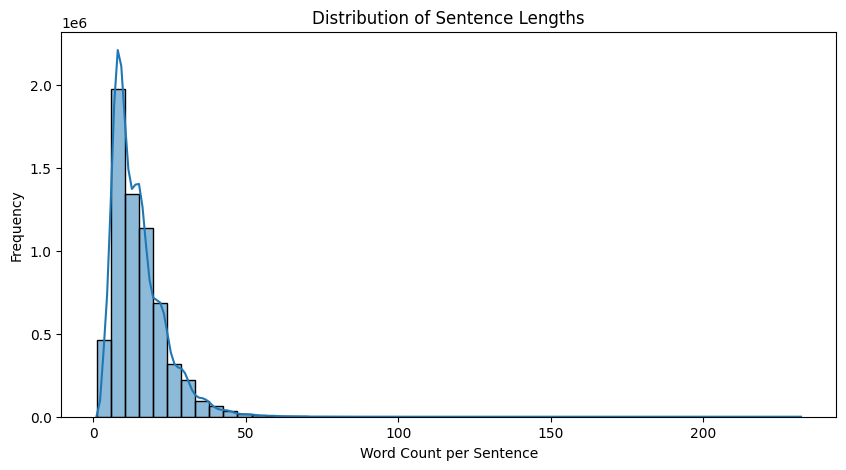

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.xlabel("Word Count per Sentence")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()

In [ ]:
from collections import Counter

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Flatten text into a single list of words
all_words = ' '.join(df['text']).split()

# Count word frequencies
word_freq = Counter(all_words)

# Total unique words
unique_words = len(word_freq)
print(f"Total Unique Words: {unique_words}")

# Most common words
print("Top 20 Most Frequent Words:", word_freq.most_common(20))

# Percentage of stopwords
stopword_count = sum(word_freq[word] for word in stop_words)
print(f"Stopwords make up {100 * stopword_count / sum(word_freq.values()):.2f}% of the dataset")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total Unique Words: 255474
Top 20 Most Frequent Words: [('.', 5728808), (',', 4331524), ('the', 3134262), ('i', 2281089), ('to', 2259861), ('and', 1976936), ("''", 1753493), ('``', 1675693), ('a', 1510883), ('he', 1455270), ('her', 1402439), ('of', 1254596), ('she', 1181790), ('was', 1163955), ('you', 1107898), ('his', 1044277), ('it', 960971), ('in', 959877), ('that', 885204), ("n't", 833968)]
Stopwords make up 42.86% of the dataset


In [ ]:
import pandas as pd

# Define sentence length bins
df['length_bin'] = pd.qcut(df['word_count'], q=5, labels=False)

# Stratified sampling: 100K rows with a mix of different lengths
df_sample = df.groupby('length_bin', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 20000), random_state=42))

# Drop extra columns
df_sample = df_sample[['text']].reset_index(drop=True)

# Save the sampled dataset
df_sample.to_csv('bookcorpus_lite_sampled_to_100k.csv', index=False)

print(f"Sampled dataset size: {len(df_sample)} rows")


<ipython-input-17-b4dc9d0db6b0>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('length_bin', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 20000), random_state=42))


Sampled dataset size: 100000 rows


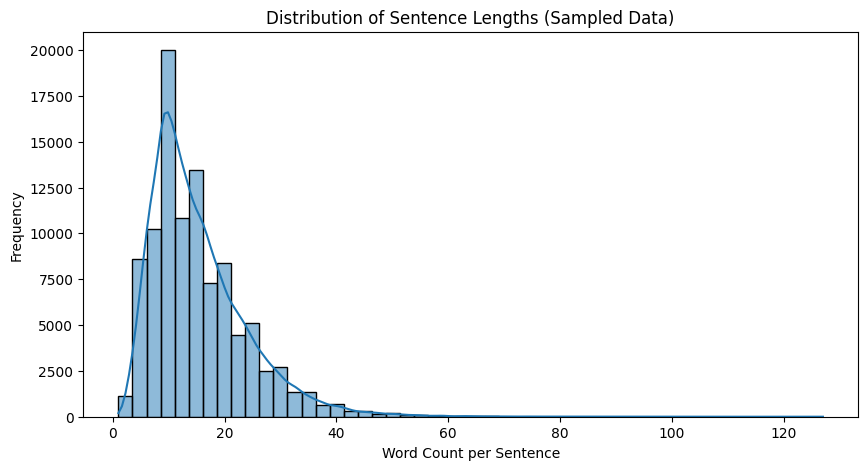

Average stopword percentage: 40.99%
Special character counts: {"'": 98288, '.': 97553, ',': 72755, '`': 52540, '?': 8519, '-': 7919, '!': 1220, '*': 2392, ':': 362, '/': 35, '(': 180, '$': 11, ')': 179, '{': 1, '}': 1, ';': 640, ']': 3, '~': 44, '[': 2, '_': 3, '#': 4, '=': 1, '%': 1, '<': 3, '>': 3, '+': 1}


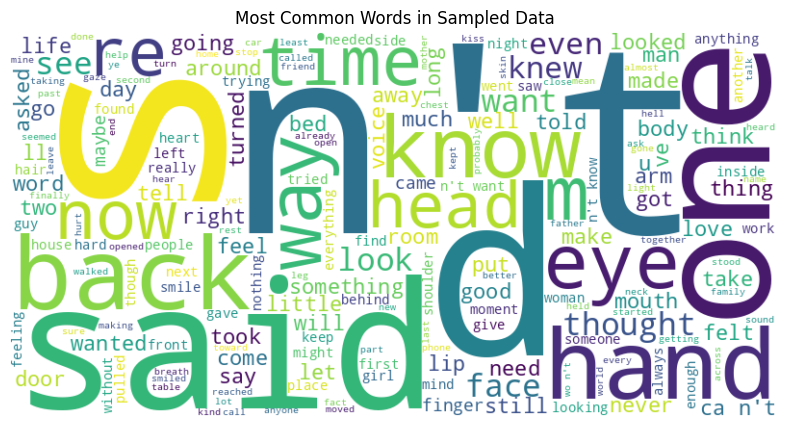

Percentage of sentences with uppercase letters: 0.00%
Unique words appearing only once: 15597 (43.10%)


In [ ]:
from wordcloud import WordCloud
import string

# Load sampled dataset
df_sample = pd.read_csv('bookcorpus_lite_sampled_to_100k.csv')

# Word count per sentence
df_sample['word_count'] = df_sample['text'].apply(lambda x: len(str(x).split()))

# Sentence Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_sample['word_count'], bins=50, kde=True)
plt.xlabel("Word Count per Sentence")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths (Sampled Data)")
plt.show()

stop_words = set(stopwords.words('english'))
df_sample['stopword_count'] = df_sample['text'].apply(lambda x: sum(1 for word in str(x).split() if word in stop_words))
df_sample['stopword_ratio'] = df_sample['stopword_count'] / df_sample['word_count']

print(f"Average stopword percentage: {df_sample['stopword_ratio'].mean() * 100:.2f}%")

# Special Characters Analysis
special_chars = Counter("".join(df_sample['text']))
special_chars = {k: v for k, v in special_chars.items() if k in string.punctuation}
print("Special character counts:", special_chars)

# Word Cloud for Common Words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_sample['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Sampled Data")
plt.show()

# Lowercase Check
df_sample['has_upper'] = df_sample['text'].apply(lambda x: any(c.isupper() for c in str(x)))
print(f"Percentage of sentences with uppercase letters: {df_sample['has_upper'].mean() * 100:.2f}%")

# Rare Words Frequency
all_words = Counter(" ".join(df_sample['text']).split())
rare_words = [word for word, count in all_words.items() if count == 1]
print(f"Unique words appearing only once: {len(rare_words)} ({len(rare_words) / len(all_words) * 100:.2f}%)")


In [ ]:
import re

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove unwanted special characters (except ., !, ?)
    text = re.sub(r"[^a-zA-Z0-9.,!?'\s]", "", text)

    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove extra punctuation (like multiple dots "...", "!!", "??")
    text = re.sub(r'([.!?])\1+', r'\1', text)

    return text

# Apply preprocessing
df_sample['cleaned_text'] = df_sample['text'].apply(clean_text)

# Remove overly long sentences (keep max 50 words)
df_sample = df_sample[df_sample['cleaned_text'].apply(lambda x: len(x.split()) <= 50)]

# Save cleaned data
df_sample[['cleaned_text']].to_csv('bookcorpus_100k_cleaned.csv', index=False)

# Display sample output
df_sample.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,word_count,stopword_count,stopword_ratio,has_upper,cleaned_text
0,because gabe did n't exist anymore .,7,2,0.285714,False,because gabe did n't exist anymore .
1,call me retired . '',5,1,0.200000,False,call me retired . ''
2,when he did n't answer ...,6,3,0.500000,False,when he did n't answer .
3,"that effort , that work .",6,2,0.333333,False,"that effort , that work ."
4,stupid brain .,3,0,0.000000,False,stupid brain .


In [ ]:
df_sample[['cleaned_text']].to_csv('bookcorpus_100k_cleaned.csv', index=False)

# Tokenization

In [ ]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('bookcorpus_100k_cleaned.csv')

# Display first few rows
print(df_cleaned.head())

# Check dataset size
print(f"Dataset size: {len(df_cleaned)} rows")

                           cleaned_text
0  because gabe did n't exist anymore .
1                  call me retired . ''
2              when he did n't answer .
3             that effort , that work .
4                        stupid brain .
Dataset size: 99600 rows


In [ ]:
import re
from nltk.tokenize.treebank import TreebankWordDetokenizer
# Load spaCy tokenizer
nlp = spacy.load("en_core_web_sm")

# Function to fix contractions and remove unnecessary characters
detokenizer = TreebankWordDetokenizer()

def fix_text(text):
    # Tokenize using spaCy
    tokens = [token.text for token in nlp(text)]

    # Fix contractions
    text_fixed = detokenizer.detokenize(tokens)

    # Remove unnecessary quotes
    text_fixed = re.sub(r"''|``|\"", "", text_fixed)

    return text_fixed

# Apply function to dataset
df_cleaned['tokenized_text'] = df_cleaned['cleaned_text'].apply(fix_text)

# Save processed dataset
df_cleaned[['tokenized_text']].to_csv('bookcorpus_100k_tokenized.csv', index=False)

print("Tokenized dataset saved as bookcorpus_100k_tokenized.csv")


Tokenized dataset saved as bookcorpus_100k_tokenized.csv


In [ ]:
df_tokenized = pd.read_csv('bookcorpus_100k_tokenized.csv')

# Display first few rows
print(df_tokenized.head())

# Check dataset size
print(f"Dataset size: {len(df_tokenized)} rows")

                       tokenized_text
0  because gabe didn't exist anymore.
1                    call me retired.
2              when he didn't answer.
3             that effort, that work.
4                       stupid brain.
Dataset size: 99600 rows


In [ ]:
# Apply word tokenization
df_tokenized['word_tokens'] = df_tokenized['tokenized_text'].apply(nltk.word_tokenize)

# Save tokenized dataset as a list format
df_tokenized[['word_tokens']].to_csv('bookcorpus_100k_word_tokens.csv', index=False)


In [ ]:
df_tokenized_word = pd.read_csv('bookcorpus_100k_word_tokens.csv')

# Display first few rows
print(df_tokenized_word.head())

# Check dataset size
print(f"Dataset size: {len(df_tokenized_word)} rows")

                                         word_tokens
0  ['because', 'gabe', 'did', "n't", 'exist', 'an...
1                     ['call', 'me', 'retired', '.']
2        ['when', 'he', 'did', "n't", 'answer', '.']
3       ['that', 'effort', ',', 'that', 'work', '.']
4                           ['stupid', 'brain', '.']
Dataset size: 99600 rows


In [ ]:
import ast
df_tokens = pd.read_csv('bookcorpus_100k_word_tokens.csv')

# Convert tokenized text from string to actual list format
df_tokens['word_tokens'] = df_tokens['word_tokens'].apply(ast.literal_eval)

# Display first few rows
print(df_tokens.head())

# Check dataset size
print(f"Dataset size: {len(df_tokens)} rows")

# Check a sample tokenized sentence
print("\nSample tokenized sentence:", df_tokens['word_tokens'].iloc[0])


                                    word_tokens
0  [because, gabe, did, n't, exist, anymore, .]
1                        [call, me, retired, .]
2               [when, he, did, n't, answer, .]
3              [that, effort, ,, that, work, .]
4                            [stupid, brain, .]
Dataset size: 99600 rows

Sample tokenized sentence: ['because', 'gabe', 'did', "n't", 'exist', 'anymore', '.']


In [ ]:
# Function to merge contractions
def merge_contractions(tokens):
    """Rejoins contractions that were split by tokenization."""
    merged_tokens = []
    i = 0

    while i < len(tokens):
        # Check if current token is a contraction prefix
        if i < len(tokens) - 1 and tokens[i + 1] in ["'s", "'m", "'ll", "'re", "'ve", "'d", "n't"]:
            merged_tokens.append(tokens[i] + tokens[i + 1])  # Merge
            i += 2  # Skip next token
        else:
            merged_tokens.append(tokens[i])
            i += 1

    return merged_tokens

# Apply function to dataset
df_tokens['word_tokens'] = df_tokens['word_tokens'].apply(merge_contractions)

In [ ]:
df_tokens.head()

,word_tokens
0,"[because, gabe, didn't, exist, anymore, .]"
1,"[call, me, retired, .]"
2,"[when, he, didn't, answer, .]"
3,"[that, effort, ,, that, work, .]"
4,"[stupid, brain, .]"


In [ ]:
df_tokens.to_csv('bookcorpus_100k_word_tokens_fixed.csv', index=False)

# text-to-sequence

In [ ]:
import pandas as pd
import ast
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
df_tokens = pd.read_csv('bookcorpus_100k_word_tokens_fixed.csv')

# Convert string representation of lists back to actual lists
df_tokens['word_tokens'] = df_tokens['word_tokens'].apply(ast.literal_eval)

# Initialize tokenizer and fit on tokenized text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_tokens['word_tokens'])

# Convert text to sequences
df_tokens['sequences'] = tokenizer.texts_to_sequences(df_tokens['word_tokens'])

# Save tokenizer for later use
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Save dataset with sequences
df_tokens[['sequences']].to_csv('bookcorpus_100k_sequences.csv', index=False)

print("Sequences saved in bookcorpus_100k_sequences.csv")
print("Tokenizer saved as tokenizer.pkl")

Sequences saved in bookcorpus_100k_sequences.csv
Tokenizer saved as tokenizer.pkl


In [ ]:
# Load the sequences
df_sequences = pd.read_csv('bookcorpus_100k_sequences.csv')
print(df_sequences.head())

# Check a sample conversion
sample_index = 0  # Change index to check other samples
print("Original Tokens:", df_tokens['word_tokens'].iloc[sample_index])
print("Converted Sequence:", df_tokens['sequences'].iloc[sample_index])

                      sequences
0  [95, 1895, 55, 3560, 574, 1]
1           [313, 19, 11350, 1]
2           [42, 9, 55, 396, 1]
3     [17, 1192, 2, 17, 249, 1]
4                 [686, 961, 1]
Original Tokens: ['because', 'gabe', "didn't", 'exist', 'anymore', '.']
Converted Sequence: [95, 1895, 55, 3560, 574, 1]


In [ ]:
MAX_SEQUENCE_LENGTH = 50  # Adjust based on dataset analysis

# Pad sequences to fixed length
df_tokens['padded_sequences'] = pad_sequences(df_tokens['sequences'], maxlen=MAX_SEQUENCE_LENGTH, padding='post').tolist()

# Save padded sequences
df_tokens[['padded_sequences']].to_csv('bookcorpus_100k_padded_sequences.csv', index=False)

print("Padded sequences saved in bookcorpus_100k_padded_sequences.csv")


Padded sequences saved in bookcorpus_100k_padded_sequences.csv


In [ ]:
import pickle

# Load tokenizer
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Print vocabulary size
print(f"Total unique words (vocabulary size): {len(tokenizer.word_index)}")

# Check word-to-ID mapping for some words
sample_words = ["the", "cat", "sat", "on", "mat"]
for word in sample_words:
    print(f"Word: {word} → Token ID: {tokenizer.word_index.get(word, 'Not Found')}")


Total unique words (vocabulary size): 36894
Word: the → Token ID: 3
Word: cat → Token ID: 1428
Word: sat → Token ID: 311
Word: on → Token ID: 23
Word: mat → Token ID: 7504


In [ ]:
import pandas as pd
import ast
import numpy as np

# Load sequences
df_sequences = pd.read_csv('bookcorpus_100k_padded_sequences.csv')

# Convert string representation of lists into actual lists
df_sequences['padded_sequences'] = df_sequences['padded_sequences'].apply(ast.literal_eval)

# Print dataset size and sequence length consistency
print(f"Dataset size: {len(df_sequences)} rows")
print("Sample sequence length:", len(df_sequences['padded_sequences'].iloc[0]))

# Ensure all sequences are of the same length
sequence_lengths = [len(seq) for seq in df_sequences['padded_sequences']]
print(f"Min sequence length: {min(sequence_lengths)}")
print(f"Max sequence length: {max(sequence_lengths)}")

# Check a sample padded sequence
print("\nSample Padded Sequence:", df_sequences['padded_sequences'].iloc[0])

Dataset size: 99600 rows
Sample sequence length: 50
Min sequence length: 50
Max sequence length: 50

Sample Padded Sequence: [95, 1895, 55, 3560, 574, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# trigram

In [ ]:
import random
import pandas as pd
import string  # Import the missing module
from collections import defaultdict
import ast
import pickle

# Load preprocessed tokenized data
df_sequences = pd.read_csv('/bookcorpus_100k_padded_sequences.csv')

# Convert sequences from string to actual list of tokens
df_sequences['sequences'] = df_sequences['padded_sequences'].apply(ast.literal_eval)

# Build trigrams (triplets of consecutive words) from sequences
trigrams = defaultdict(list)

for seq in df_sequences['sequences']:
    for i in range(len(seq) - 2):
        trigrams[(seq[i], seq[i+1])].append(seq[i+2])  # (word1, word2) -> next word

# Load the tokenizer to map word IDs back to words
with open('/tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Reverse the word_index to map IDs to words
index_to_word = {v: k for k, v in tokenizer.word_index.items()}

# Function to generate text based on a query using the Trigram model
def generate_text_from_query(query, num_words=50):
    query_tokens = query.lower().split()
    # Use the last two words of the query for trigrams
    current_words = tuple(query_tokens[-2:])
    output = query_tokens

    # Generate text based on trigrams
    for _ in range(num_words - len(query_tokens)):
        if current_words in trigrams:
            next_word_id = random.choice(trigrams[current_words])
            next_word = index_to_word.get(next_word_id, None)  # Get word from ID

            if next_word:  # If a valid word is found
                output.append(next_word)
                current_words = (current_words[1], next_word)  # Update context with the new word
            else:
                break  # Stop if no next word is found
        else:
            # If no valid trigram, pick a random word from the model
            current_words = random.choice(list(trigrams.keys()))
            next_word_id = current_words[1]
            next_word = index_to_word.get(next_word_id, None)
            if next_word:
                output.append(next_word)
            else:
                break  # Stop if we encounter an invalid ID

    # Clean up the output by removing excessive punctuation and ensuring spacing
    output = [word for word in output if word not in string.punctuation]  # Remove punctuation marks
    output = [word.strip() for word in output]  # Strip any extra spaces or unwanted characters
    # Ensure everything in output is a string before joining
    output = [str(word) for word in output if word]
    return ' '.join(output)

# Test with a query
query = "Once upon a time"
generated_text = generate_text_from_query(query, num_words=50)
print("Generated Text:", generated_text)


Generated Text: once upon a time for information luis's circle you to canceling would answer without made surveying the as possible when claim to have been himself away thought his flowed inside image of clear and park far corner of my arched into leaf and them now brought me


# 4-gram

In [ ]:
import random
import pandas as pd
from collections import defaultdict
import string

# Load preprocessed tokenized data
df_sequences = pd.read_csv('bookcorpus_100k_padded_sequences.csv')

# Convert sequences from string to actual list of tokens
import ast
df_sequences['sequences'] = df_sequences['padded_sequences'].apply(ast.literal_eval)

# Build 4-grams (quadruples of consecutive words) from sequences
fourgrams = defaultdict(list)

for seq in df_sequences['sequences']:
    for i in range(len(seq) - 3):
        fourgrams[(seq[i], seq[i+1], seq[i+2])].append(seq[i+3])  # (word1, word2, word3) -> next word

# Load the tokenizer to map word IDs back to words
with open('tokenizer.pkl', 'rb') as f:
    import pickle
    tokenizer = pickle.load(f)

# Reverse the word_index to map IDs to words
index_to_word = {v: k for k, v in tokenizer.word_index.items()}

# Function to generate text based on a query using the 4-gram model
def generate_text_from_query_4gram(query, num_words=50):
    query_tokens = query.lower().split()
    # Use the last three words of the query for 4-grams
    current_words = tuple(query_tokens[-3:])
    output = query_tokens

    # Generate text based on 4-grams
    for _ in range(num_words - len(query_tokens)):
        if current_words in fourgrams:
            next_word_id = random.choice(fourgrams[current_words])
            next_word = index_to_word.get(next_word_id, None)  # Get word from ID

            if next_word:  # If a valid word is found
                output.append(next_word)
                current_words = (current_words[1], current_words[2], next_word)  # Update context with the new word
            else:
                break  # Stop if no next word is found
        else:
            # If no valid 4-gram, pick a random word from the model
            current_words = random.choice(list(fourgrams.keys()))
            next_word_id = current_words[2]
            next_word = index_to_word.get(next_word_id, None)
            if next_word:
                output.append(next_word)
            else:
                break  # Stop if we encounter an invalid ID

    # Clean up the output by removing excessive punctuation and ensuring spacing
    output = [word for word in output if word not in string.punctuation]  # Remove punctuation marks
    output = [word.strip() for word in output]  # Strip any extra spaces or unwanted characters
    # Ensure everything in output is a string before joining
    output = [str(word) for word in output if word]
    return ' '.join(output)

# Test with a query
query = "once upon a time"
generated_text = generate_text_from_query_4gram(query, num_words=50)
print("Generated Text:", generated_text)


In [ ]:
import random
import pandas as pd
from collections import defaultdict, Counter, deque
import string
import ast
import pickle
import nltk
from nltk.util import bigrams

# Load preprocessed tokenized data
df_sequences = pd.read_csv('/bookcorpus_100k_padded_sequences.csv')

# Convert sequences from string to actual list of tokens
df_sequences['sequences'] = df_sequences['padded_sequences'].apply(ast.literal_eval)

# Build 4-grams with probabilities
fourgrams = defaultdict(list)
fourgram_counts = defaultdict(Counter)  # Store frequency counts

for seq in df_sequences['sequences']:
    for i in range(len(seq) - 3):
        key = (seq[i], seq[i+1], seq[i+2])
        next_word = seq[i+3]
        fourgrams[key].append(next_word)
        fourgram_counts[key][next_word] += 1  # Count occurrences of each next word

# Load the tokenizer to map word IDs back to words
with open('/tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Reverse the word_index to map IDs to words
index_to_word = {v: k for k, v in tokenizer.word_index.items()}

# Function to generate text using weighted probabilities & avoid repetitions
def generate_text_from_query_4gram(query, num_words=50):
    query_tokens = query.lower().split()
    current_words = tuple(query_tokens[-3:])
    output = query_tokens
    used_words = deque(maxlen=5)  # Track last 5 used words to avoid frequent repetition

    for _ in range(num_words - len(query_tokens)):
        if current_words in fourgram_counts:
            next_word_choices = fourgram_counts[current_words]

            # Filter out words that appear too frequently in recent context
            filtered_choices = {word: count for word, count in next_word_choices.items() if word not in used_words}

            # If all words are used up, reset restrictions slightly
            if not filtered_choices:
                filtered_choices = next_word_choices

            next_word_id = random.choices(
                list(filtered_choices.keys()),
                weights=list(filtered_choices.values()),
                k=1
            )[0]
            next_word = index_to_word.get(next_word_id, None)

            if next_word:
                output.append(next_word)
                used_words.append(next_word)  # Track word usage
                current_words = (current_words[1], current_words[2], next_word)
            else:
                break
        else:
            # If no valid 4-gram, pick a high-probability word
            if fourgram_counts:
                current_words = random.choice(list(fourgram_counts.keys()))
                next_word_id = max(fourgram_counts[current_words], key=fourgram_counts[current_words].get)
                next_word = index_to_word.get(next_word_id, None)
                if next_word:
                    output.append(next_word)
                    used_words.append(next_word)  # Track word usage
            else:
                break

    # Clean up output
    output = [word for word in output if word not in string.punctuation]

    # Grammar Fix: Remove duplicate bigrams
    clean_output = []
    seen_bigrams = set()
    for bigram in bigrams(output):
        if bigram not in seen_bigrams:
            clean_output.append(bigram[0])
            seen_bigrams.add(bigram)
    clean_output.append(output[-1])  # Add last word

    result = ' '.join(clean_output).capitalize()  # Capitalize first word
    return result

# Test the improved model
query = "hi my love"
generated_text = generate_text_from_query_4gram(query, num_words=50)
print("Generated Text:", generated_text)


Generated Text: Hi my love her her run run sovereign sovereign the the came came the in in that's that's with with hour inch well well holding holding had had guy of of had


In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
prompt = "Once upon a time"
inputs = tokenizer(prompt, return_tensors="pt")
output = model.generate(**inputs, max_length=50)
print(tokenizer.decode(output[0], skip_special_tokens=True))


In [ ]:
!pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## ***TRANSFORMER MODEL BUILT FROM SCRATCH***

In [ ]:
# ------------------ Imports ------------------ #
import numpy as np
import tensorflow as tf
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer, Embedding, Dropout, LayerNormalization, Dense, MultiHeadAttention

# ------------------ Custom Embedding Layer ------------------ #
class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, d_model, **kwargs):
        super().__init__(**kwargs)
        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.d_model = d_model
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=d_model)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=d_model)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[-1], delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

    def get_config(self):
        config = super().get_config()
        config.update({
            'maxlen': self.maxlen,
            'vocab_size': self.vocab_size,
            'd_model': self.d_model
        })
        return config

# ------------------ Custom Transformer Block ------------------ #
class TransformerBlock(Layer):
    def __init__(self, d_model, num_heads, ff_dim, rate=0.1, **kwargs):
        super().__init__(**kwargs)
        self.d_model = d_model
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.rate = rate

        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(d_model),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            'd_model': self.d_model,
            'num_heads': self.num_heads,
            'ff_dim': self.ff_dim,
            'rate': self.rate
        })
        return config

# ------------------ Load Tokenizer ------------------ #
with open("/content/tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# ------------------ Load Model ------------------ #
model = load_model(
    "/content/best_transformer_model.keras",
    custom_objects={
        "TokenAndPositionEmbedding": TokenAndPositionEmbedding,
        "TransformerBlock": TransformerBlock
    }
)

# ------------------ Text Generation Function ------------------ #
def generate_text(prompt, tokenizer, model, max_words=50, temperature=1.2, repetition_penalty=0.9, maxlen=49):
    input_ids = tokenizer.texts_to_sequences([prompt])[0]
    print("Initial input IDs:", input_ids)

    generated_ids = set(input_ids)
    last_token = None

    for _ in range(max_words):
        padded_input = tf.keras.preprocessing.sequence.pad_sequences(
            [input_ids], maxlen=maxlen, padding='pre'
        )

        preds = model.predict(padded_input, verbose=0)[0][-1]

        # Apply temperature
        preds = np.log(preds + 1e-9) / temperature
        exp_preds = np.exp(preds)
        probs = exp_preds / np.sum(exp_preds)

        # Repetition penalty
        for idx in generated_ids:
            probs[idx] *= repetition_penalty

        # Normalize again
        probs = probs / np.sum(probs)

        # Suppress repeated last token
        if last_token is not None:
            probs[last_token] *= 0.01
            probs = probs / np.sum(probs)

        # Avoid <UNK> token (index 0)
        probs[0] = 0.0
        probs = probs / np.sum(probs)

        # Sample next token
        next_id = np.random.choice(len(probs), p=probs)
        input_ids.append(next_id)
        generated_ids.add(next_id)

        if next_id == 0:
            break

        last_token = next_id

    decoded_text = tokenizer.sequences_to_texts([input_ids])[0]
    return " ".join(decoded_text.split())

# ------------------ Try a Prompt ------------------ #
user_query = "science fictioin tale "
generated_text = generate_text(user_query, tokenizer, model, max_words=50, temperature=1.2)

print("\n📝 Generated Paragraph:\n", generated_text)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'token_and_position_embedding_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'transformer_block_6', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'transformer_bl

Initial input IDs: [7672, 6107]

📝 Generated Paragraph:
 science tale nice danced stream ! heaved move it sad , expression like stroked vampire smiling melanie's obnoxious if sugar today this do own help figure cleo us called speechless would time first you reached heading kids for heartless lead age through . they yesterday , . only yale wonder lips also


## ***BEST TRANSFORMER BUILT WITHOUT USING PRETRAINED MODEL***

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
import ast
import os

# ✅ Load Tokenizer
with open("/kaggle/input/bookcorpus/tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

VOCAB_SIZE = len(tokenizer.word_index) + 1
MAX_LEN = 50  # sequence length used in training

# ✅ Load Dataset
df = pd.read_csv("/kaggle/input/bookcorpus/bookcorpus_100k_padded_sequences.csv")
df["padded_sequences"] = df["padded_sequences"].apply(ast.literal_eval)
sequences = df["padded_sequences"].tolist()
sequences = sequences[:50000]

# Split into input and target
X = np.array([seq[:-1] for seq in sequences])
y = np.array([seq[1:] for seq in sequences])

# ✅ Positional Encoding
def get_positional_encoding(maxlen, d_model):
    pos = np.arange(maxlen)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = pos * angle_rates
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return tf.cast(angle_rads, dtype=tf.float32)

class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def _init_(self, maxlen, vocab_size, d_model):
        super()._init_()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=d_model)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=d_model)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# ✅ Transformer Block
class TransformerBlock(tf.keras.layers.Layer):
    def _init_(self, d_model, num_heads, ff_dim, rate=0.1):
        super()._init_()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(ff_dim, activation="relu"),
            tf.keras.layers.Dense(d_model),
        ])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training=False):  # ✅ Default training=False
        attn_output = self.att(inputs, inputs, training=training)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1, training=training)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


# ✅ Build Model
def build_model(vocab_size, maxlen=MAX_LEN, d_model=256, ff_dim=1024, num_heads=8, num_layers=6):
    inputs = tf.keras.Input(shape=(maxlen - 1,))
    x = TokenAndPositionEmbedding(maxlen, vocab_size, d_model)(inputs)

    for _ in range(num_layers):
        x = TransformerBlock(d_model, num_heads, ff_dim)(x)

    outputs = tf.keras.layers.Dense(vocab_size, activation="softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

model = build_model(VOCAB_SIZE)

# ✅ Compile Model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
)

# ✅ Setup Checkpointing and Callbacks
checkpoint_dir = "/kaggle/working"
checkpoint_path = os.path.join(checkpoint_dir, "best_transformer_model.keras")

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        monitor="loss",
        save_best_only=True,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="loss",
        patience=3,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="loss",
        patience=2,
        factor=0.5,
        verbose=1
    )
]

# ✅ Training
EPOCHS = 20  # This can be increased to 30 if needed
BATCH_SIZE = 64

history = model.fit(
    X, y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks
)

print("✅ Training Complete!")


## ***INRODUCING PRETRAINED TRANSFORMERS - (GPT-2)***

In [ ]:
import pandas as pd
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import Dataset

# Load the dataset
df = pd.read_csv('/content/bookcorpus_100k_padded_sequences.csv')

# Convert sequences from string to list
import ast
df['sequences'] = df['padded_sequences'].apply(ast.literal_eval)

# Load the tokenizer (assumes you have a saved tokenizer)
import pickle
with open('/content/tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Convert tokenized sequences back to text
def decode_sequence(seq):
    return " ".join([tokenizer.index_word.get(word_id, "[UNK]") for word_id in seq if word_id != 0])

df['text'] = df['sequences'].apply(decode_sequence)

# Convert to Hugging Face Dataset format
dataset = Dataset.from_pandas(df[['text']])


In [ ]:
# Load pretrained GPT-2 tokenizer & model
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token  # Set pad token

gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2")

# Tokenize dataset
def tokenize_function(examples):
    return gpt2_tokenizer(examples["text"], truncation=True, padding="max_length", max_length=50)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["text"])

# Data collator for efficient training
data_collator = DataCollatorForLanguageModeling(tokenizer=gpt2_tokenizer, mlm=False)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Map:   0%|          | 0/99600 [00:00<?, ? examples/s]

## ***FINE TUNING GPT-2***

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./gpt2_finetuned",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Initialize Trainer
trainer = Trainer(
    model=gpt2_model,
    args=training_args,
    train_dataset=tokenized_datasets,
    eval_dataset=tokenized_datasets,  # Use same dataset for evaluation
    tokenizer=gpt2_tokenizer,
    data_collator=data_collator,
)

# Start fine-tuning
trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-8-34ce9a3072b1>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: latraman35 (latraman35-shiv-nadar-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Epoch,Training Loss,Validation Loss
1,3.506300,3.508990
2,3.353500,3.396403
3,3.273500,3.361942


TrainOutput(global_step=4671, training_loss=3.4020301461143223, metrics={'train_runtime': 5038.7254, 'train_samples_per_second': 59.301, 'train_steps_per_second': 0.927, 'total_flos': 7624419840000000.0, 'train_loss': 3.4020301461143223, 'epoch': 3.0})

In [ ]:
# Save the fine-tuned model
trainer.save_model("./gpt2_finetuned")

# Save the tokenizer as well (important if you modified or used a custom one)
gpt2_tokenizer.save_pretrained("./gpt2_finetuned")


('./gpt2_finetuned/tokenizer_config.json',
 './gpt2_finetuned/special_tokens_map.json',
 './gpt2_finetuned/vocab.json',
 './gpt2_finetuned/merges.txt',
 './gpt2_finetuned/added_tokens.json')

In [ ]:
!zip -r gpt2_finetuned.zip gpt2_finetuned


  adding: gpt2_finetuned/ (stored 0%)
  adding: gpt2_finetuned/vocab.json (deflated 68%)
  adding: gpt2_finetuned/generation_config.json (deflated 24%)
  adding: gpt2_finetuned/model.safetensors (deflated 7%)
  adding: gpt2_finetuned/tokenizer_config.json (deflated 56%)
  adding: gpt2_finetuned/training_args.bin (deflated 51%)
  adding: gpt2_finetuned/checkpoint-1557/ (stored 0%)
  adding: gpt2_finetuned/checkpoint-1557/vocab.json (deflated 68%)
  adding: gpt2_finetuned/checkpoint-1557/generation_config.json (deflated 24%)
  adding: gpt2_finetuned/checkpoint-1557/model.safetensors (deflated 7%)
  adding: gpt2_finetuned/checkpoint-1557/tokenizer_config.json (deflated 56%)
  adding: gpt2_finetuned/checkpoint-1557/trainer_state.json (deflated 60%)
  adding: gpt2_finetuned/checkpoint-1557/training_args.bin (deflated 51%)
  adding: gpt2_finetuned/checkpoint-1557/optimizer.pt (deflated 8%)
  adding: gpt2_finetuned/checkpoint-1557/scheduler.pt (deflated 56%)
  adding: gpt2_finetuned/checkpoin

In [ ]:
from google.colab import files
files.download('gpt2_finetuned.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***GENERATING TEXT FROM GPT-2(NON-FINETUNED)***

In [ ]:
def generate_text(prompt, max_length=50):
    device = "cuda" if torch.cuda.is_available() else "cpu"  # Detect if GPU is available
    input_ids = gpt2_tokenizer.encode(prompt, return_tensors="pt").to(device)  # Move input_ids to the same device
    output = gpt2_model.generate(
        input_ids,
        max_length=max_length,
        do_sample=True,
        top_k=50,
        top_p=0.95
    )
    return gpt2_tokenizer.decode(output[0], skip_special_tokens=True)

query = "Once upon a time"
generated_text = generate_text(query, max_length=50)
print("Generated Text:", generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Text: Once upon a time , her heart was already thudding and her lungs were already bursting with adrenaline . as if a powerful , strong magic had come into her body and her mind had become filled with an overwhelming surge of hope . that she was finally being


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer


model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Function to generate text using GPT-2
def generate_text_gpt2(prompt, max_length=50):
    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    output = model.generate(input_ids, max_length=max_length, num_return_sequences=1, do_sample=True, top_k=50, top_p=0.95)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Test with a query
query = "i am batman"
generated_text = generate_text_gpt2(query, max_length=50)
print("Generated Text:", generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text: i am batman to the point of making her scream. I am a vampire.

Soumeno's face is a grim one. "Hm? What are you-"

A dark-eyed vampire, he looks up.


## ***GPT-2 (FINE-TUNED)***

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load model and tokenizer from extracted folder
model_path = "/content/gpt2_finetuned"

tokenizer = GPT2Tokenizer.from_pretrained(model_path)
model = GPT2LMHeadModel.from_pretrained(model_path)
model.to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

# Function to generate text
def generate_text(prompt, max_length=50):
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(model.device)
    output = model.generate(
        input_ids,
        max_length=max_length,
        do_sample=True,
        top_k=50,
        top_p=0.95
    )
    return tokenizer.decode(output[0], skip_special_tokens=True)

# Get user input
prompt = input("Enter your prompt: ")
print("\nGenerated Text:\n", generate_text(prompt))


Enter your prompt: once upon a time


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



Generated Text:
 once upon a time the vampire would have called out a spell before they'd actually shot . well , he wasn't a vampire . so maybe . it wasn't really . until he caught her breath and moved away . well . you could say she didn
